In [4]:
%matplotlib inline
import qiskit as q
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

def list_backends():
    provider = IBMQ.get_provider("ibm-q")
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = "simulated"
        
        print(backend.name(), "has", backend.status().pending_jobs, "qued and", qubit_count, "qubits")

def run(b, circuit):
    provider = IBMQ.get_provider("ibm-q")
    backend = provider.get_backend(b)
    job = q.execute(circuit, backend=backend, shots=1000)
    job_monitor(job)
    return(job)


IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-07-25 12:56:20,767: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

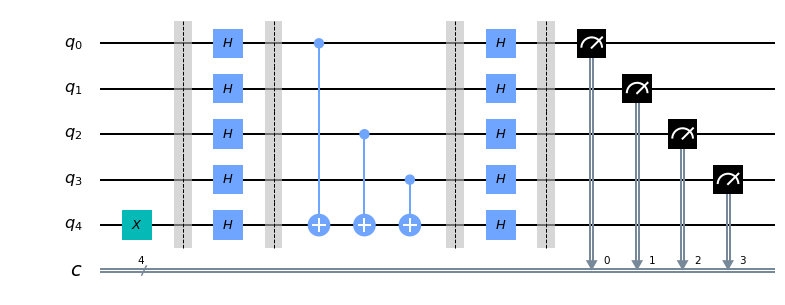

In [5]:
s = '1101'
n = len(s)
circuit = q.QuantumCircuit(n+1,n)
circuit.x(n)
circuit.barrier()
circuit.h(range(n+1))
circuit.barrier()

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier()
circuit.h(range(n+1))
circuit.barrier()
circuit.measure(range(n), range(n))
circuit.draw()

In [ ]:
job = run("ibmq_london", circuit)

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

Job Status: job is actively running

In [ ]:
biggest = 0
index = 0

for i in counts:
    if(counts[i] > biggest):
        biggest = counts[i]
        index = i

print("The number is", index)